In [109]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [140]:
t = np.array([0, 180, 360, 540, 720])
t = t/72

In [141]:
n = np.array([0.8, 0.81, 0.82, 0.41, 0.22])

In [128]:
def graph_data(x,y,x_2,y_2):
    plt.figure()
    plt.scatter(x,y, color='red')
    plt.plot(x_2,y_2, color='blue')
    plt.xlabel('Number of Days')
    plt.ylabel('Number of Cells')
    plt.title("Vector Cells - Regular Cancer Cells")
    return plt.show()

In [107]:
def main():
    #below are the collected data points from the lab
    #data_1 = [(0,150000),
    #        (1,60500),
     #       (2,98000),
      #      (3,185500),
       #     (4,222000),
        #    (5,234500),
         #   (6,425500),
         #   (7,652500),
         #   (8,1068500),
         #   (9,1517500),
         #   (12,2938000),
         #   (13,2987500),
         #   (14,2960500)]

    #store x values (time) of the data into array t
    #t = np.array([data[0] for data in data_1])
    #store y values (number of cells) of the data into array n
    #n = np.array([data[1] for data in data_1])
    
    #normalization of the data
    min_n = float(min(n))
    max_n = float(max(n))
    norm_n =[] #this is the new list where the normalized data goes
    for i in range(len(n)):
        value = float((n[i] - min_n) / (max_n - min_n))
        norm_n.append(value)
    
    #user makes the initial guesses for the parameters and step size
    a = float(input("Initial value for a: "))
    initial_a = a
    b = float(input("Initial value for b: "))
    initial_b = b
    c = float(input("Initial value for c: "))
    initial_c = c
    step_size = float(input("Determine the step size: "))
    #initialize variables
    prev_a = a
    prev_b = b
    prev_c = c
    iteration = 0

    #calculate and solve the parameters using the gradient descent method
    while True:
        iteration += 1
        partial_a = 0
        partial_b = 0
        partial_c = 0
        for i in range(len(t)):
            partial_a += (a * np.exp(-2*b * np.exp(-c * t[i])) - (norm_n[i] * np.exp(-b * np.exp(-c * t[i]))))
        for i in range(len(t)):
            partial_b += (-(a**2) * np.exp(-c*t[i]-2*b*np.exp(-c*t[i])) + (norm_n[i] * a * np.exp(-c*t[i]-b*np.exp(-c*t[i]))))
        for i in range(len(t)):
            partial_c += (a**2 *b*t[i]*np.exp(-c*t[i]-2*b*np.exp(-c*t[i])) - (norm_n[i]*a*b*t[i]*np.exp(-c*t[i]-b*np.exp(-c*t[i]))))
        a = prev_a  - (step_size * partial_a) #next iteration of a gets updated i.e. a^(k+1)
        b = prev_b  - (step_size * partial_b)
        c = prev_c  - (step_size * partial_c)
        #print(f"iteration: {iteration}")
        #print(f"partial a: {partial_a}, partial b:{partial_b}, partial c: {partial_c}")
        #print(f"Iteration: {iteration}")#checks for infinite loop
        if abs(partial_a)<0.0001 and abs(partial_b)<0.0001 and abs(partial_c)<0.0001: #termination condition for the gradient descent algorithm
            print (f"After {iteration}th interations: ")
            print (f"Parameter a is: {a} and partial A is {partial_a}")
            print (f"Parameter b is: {b} and partial B is {partial_b}")
            print (f"Parameter c is: {c} and partial C is {partial_c}")
            #Use the parameters found here for the function f(t). Get and store the output values for the graph
            x = np.linspace(0,750,100)
            f_t = []
            for i in range(len(x)):
                function_t = a * np.exp(-b * np.exp(-c * x[i]))
                f_t.append(function_t)
            graph_data(t,norm_n,x,f_t)#calls the graphing function and graphs
            break
        elif iteration>500000:
            print("Too many iterations")
            print(initial_a, initial_b, initial_c, step_size)
            print(a,b,c)
            print(f"partial a: {partial_a}, partial b:{partial_b}, partial c: {partial_c}")
            break
        prev_a = a
        prev_b = b
        prev_c = c

Initial value for a:  1
Initial value for b:  1
Initial value for c:  1
Determine the step size:  .03


After 673th interations: 
Parameter a is: 0.5750491003881176 and partial A is 2.5726475454734832e-05
Parameter b is: -0.5192930045981367 and partial B is 9.992196199293257e-05
Parameter c is: 1.0 and partial C is 1.4734758654271786e-77


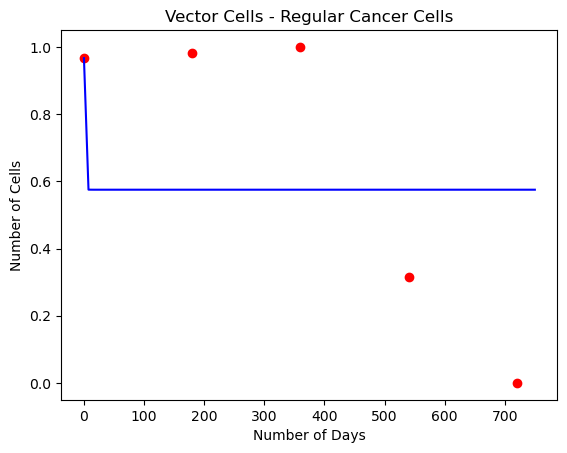

In [108]:
main()

In [151]:
def main2():
    #below are the collected data points from the lab
   # data_1 = [(0,150000),
     #       (1,60500),
     #       (2,98000),
     #       (3,185500),
     #       (4,222000),
     #       (5,234500),
     #       (6,425500),
     #       (7,652500),
     #       (8,1068500),
     #       (9,1517500),
     #       (12,2938000),
     #       (13,2987500),
     #       (14,2960500)]

    #store x values (time) of the data into array t
    #t = np.array([data[0] for data in data_1])
    #store y values (number of cells) of the data into array n
    #n = np.array([data[1] for data in data_1])
    
    #normalization of the data
    min_n = float(min(n))
    max_n = float(max(n))
    norm_n =[] #this is the new list where the normalized data goes
    for i in range(len(n)):
        value = float((n[i] - min_n) / (max_n - min_n))
        norm_n.append(value)
    
    #user makes the initial guesses for the parameters and step size
    a = float(input("Initial value for a: "))
    initial_a = a
    b = float(input("Initial value for b: "))
    initial_b = b
    c = float(input("Initial value for c: "))
    initial_c = c
    d = float(input("Initial value for d:"))
    initial_d = d
    step_size = float(input("Determine the step size: "))
    #initialize variables
    prev_a = a
    prev_b = b
    prev_c = c
    prev_d = d
    iteration = 0

    #calculate and solve the parameters using the gradient descent method
    while True:
        iteration += 1
        partial_a = 0
        partial_b = 0
        partial_c = 0
        partial_d = 0
        for i in range(len(t)):
            partial_a += 2*(a * np.exp(-2*b * np.exp(-c * t[i])) - (norm_n[i] * np.exp(-b * np.exp(-c * t[i]))) + (d * np.exp(-b * np.exp(-c * t[i]))))
        for i in range(len(t)):
            partial_b += 2*(-(a**2) * np.exp(-c*t[i]-2*b*np.exp(-c*t[i])) + (norm_n[i] * a * np.exp(-c*t[i] - b*np.exp(-c*t[i]))) - (a*d* np.exp(-c*t[i] - b*np.exp(-c*t[i]))))
        for i in range(len(t)):
            partial_c += 2*((a**2) *b*t[i]*np.exp(-c*t[i]-2*b*np.exp(-c*t[i])) - (norm_n[i]*a*b*t[i]*np.exp(-c*t[i] - b*np.exp(-c*t[i]))) + (t[i]*a*b*d* np.exp(-c*t[i] - b * np.exp(-c*t[i]))))
        for i in range(len(t)):
            partial_d += 2*(a*np.exp(-b*np.exp(-c*t[i])) + d - norm_n[i])
        a = prev_a  - (step_size * partial_a) #next iteration of a gets updated i.e. a^(k+1)
        b = prev_b  - (step_size * partial_b)
        c = prev_c  - (step_size * partial_c)
        d = prev_d  - (step_size * partial_d)
        #print(f"iteration: {iteration}")
        #print(f"partial a: {partial_a}, partial b:{partial_b}, partial c: {partial_c}")
        #print(f"Iteration: {iteration}")#checks for infinite loop
        if abs(partial_a)<0.0001 and abs(partial_b)<0.0001 and abs(partial_c)<0.0001 and abs(partial_d)<0.0001: #termination condition for the gradient descent algorithm
            print (f"After {iteration}th iteration: ")
            print (f"Parameter a is: {a} and partial A is {partial_a}")
            print (f"Parameter b is: {b} and partial B is {partial_b}")
            print (f"Parameter c is: {c} and partial C is {partial_c}")
            print (f"Parameter d is: {d} and partial D is {partial_d}")
            #Use the parameters found here for the function f(t). Get and store the output values for the graph
            x = np.linspace(0,14,100)
            f_t = []
            for i in range(len(x)):
                function_t = (a * np.exp(-b * np.exp(-c * x[i]))) + d
                f_t.append(function_t)
            graph_data(t,norm_n,x,f_t)#calls the graphing function and graphs
            break
        elif iteration>2000000:
            print("Too many iterations")
            print(initial_a, initial_b, initial_c, initial_d, step_size)
            print(a,b,c,d)
            print(f"partial a: {partial_a}, partial b:{partial_b}, partial c: {partial_c}, partial d: {partial_d}")
            break
        prev_a = a
        prev_b = b
        prev_c = c
        prev_d = d

Initial value for a:  1
Initial value for b:  75
Initial value for c:  1
Initial value for d: 1
Determine the step size:  .03


After 348th iteration: 
Parameter a is: -1.128478231897143 and partial A is 9.905222761062704e-05
Parameter b is: 75.00220347597862 and partial B is -9.939146536221583e-05
Parameter c is: 0.6566774516406577 and partial C is 2.0845806932762168e-05
Parameter d is: 1.0008966525319272 and partial D is -1.1738358695057016e-05


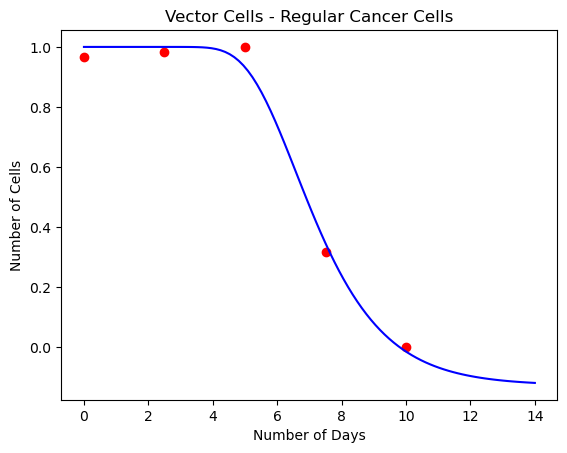

In [166]:
main2()